<a href="https://colab.research.google.com/github/Mohammed-af/course-collaboration-travel-plans/blob/master/stc_TV_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STC Jawwy

In [ ]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices
from google.colab import drive
drive.mount('/content/gdrive')
from fbprophet import Prophet


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [ ]:
dataframe = pd.read_excel("/content/gdrive/My Drive/Jupytar/stc TV Data Set_T2.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()
df=dataframe.copy()

In [ ]:
# check the data shape
dataframe.shape

(86, 2)

In [ ]:
# display the first 5 rows 
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [ ]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [ ]:
# describe the numeric values in the dataset
dataframe.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [ ]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [ ]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [ ]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [ ]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

In [ ]:

"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results

"""





'\nTODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months\nHint: you can build a forecast model to predict the results\n\n'

In [ ]:
df_data

,date_,Total_watch_time_in_houres,year,month,day,Date
0,2018-01-01,1123.551944,2018,01,01,2018-01-01
1,2018-01-02,1000.129722,2018,01,02,2018-01-02
2,2018-01-03,881.924444,2018,01,03,2018-01-03
3,2018-01-04,782.669444,2018,01,04,2018-01-04
4,2018-01-05,1051.939444,2018,01,05,2018-01-05
...,...,...,...,...,...,...
81,2018-04-24,652.625278,2018,04,24,2018-04-24
82,2018-04-25,650.428889,2018,04,25,2018-04-25
83,2018-04-26,675.184444,2018,04,26,2018-04-26
84,2018-04-27,601.738056,2018,04,27,2018-04-27


In [ ]:
df_data['year'] = df_data['date_'].apply(lambda x: str(x)[:4])
df_data['month'] = df_data['date_'].apply(lambda x: str(x)[5:7])
df_data['day'] = df_data['date_'].apply(lambda x: str(x)[8:10])
df_data['Date'] = df_data['date_'].apply(lambda x: str(x)[:10])

In [ ]:

df_data.columns = ['y', 'ds']

In [ ]:
df_data

,y,ds
0,1123.551944,2018-01-01
1,1000.129722,2018-01-02
2,881.924444,2018-01-03
3,782.669444,2018-01-04
4,1051.939444,2018-01-05
...,...,...
81,652.625278,2018-04-24
82,650.428889,2018-04-25
83,675.184444,2018-04-26
84,601.738056,2018-04-27


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=60, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,51.430175,737.695106,1114.789252,51.430175,51.430175,874.263743,874.263743,874.263743,821.883157,821.883157,821.883157,52.380586,52.380586,52.380586,0.0,0.0,0.0,925.693918
1,2018-01-02,49.152521,732.269971,1099.177822,49.152521,49.152521,863.629405,863.629405,863.629405,821.883157,821.883157,821.883157,41.746248,41.746248,41.746248,0.0,0.0,0.0,912.781926
2,2018-01-03,46.874867,712.843985,1062.186105,46.874867,46.874867,846.955829,846.955829,846.955829,821.883157,821.883157,821.883157,25.072672,25.072672,25.072672,0.0,0.0,0.0,893.830696
3,2018-01-04,44.597214,716.801628,1067.883221,44.597214,44.597214,850.883216,850.883216,850.883216,821.883157,821.883157,821.883157,29.000059,29.000059,29.000059,0.0,0.0,0.0,895.480430
4,2018-01-05,42.319560,734.113291,1109.099364,42.319560,42.319560,879.154415,879.154415,879.154415,821.883157,821.883157,821.883157,57.271258,57.271258,57.271258,0.0,0.0,0.0,921.473975


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
141,2018-06-25,-347.159224,350.950264,699.244701,-347.159256,-347.159193,874.263743,874.263743,874.263743,821.883157,821.883157,821.883157,52.380586,52.380586,52.380586,0.0,0.0,0.0,527.104519
142,2018-06-26,-349.436877,335.576975,690.480875,-349.436910,-349.436845,863.629405,863.629405,863.629405,821.883157,821.883157,821.883157,41.746248,41.746248,41.746248,0.0,0.0,0.0,514.192528
143,2018-06-27,-351.714531,322.175687,678.106886,-351.714565,-351.714498,846.955829,846.955829,846.955829,821.883157,821.883157,821.883157,25.072672,25.072672,25.072672,0.0,0.0,0.0,495.241298
144,2018-06-28,-353.992185,311.756350,671.865840,-353.992219,-353.992151,850.883216,850.883216,850.883216,821.883157,821.883157,821.883157,29.000059,29.000059,29.000059,0.0,0.0,0.0,496.891031
145,2018-06-29,-356.269839,335.786823,701.420033,-356.269874,-356.269804,879.154415,879.154415,879.154415,821.883157,821.883157,821.883157,57.271258,57.271258,57.271258,0.0,0.0,0.0,522.884577


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,925.693918
1,2018-01-02,912.781926
2,2018-01-03,893.830696
3,2018-01-04,895.480430
4,2018-01-05,921.473975
...,...,...
141,2018-06-25,527.104519
142,2018-06-26,514.192528
143,2018-06-27,495.241298
144,2018-06-28,496.891031


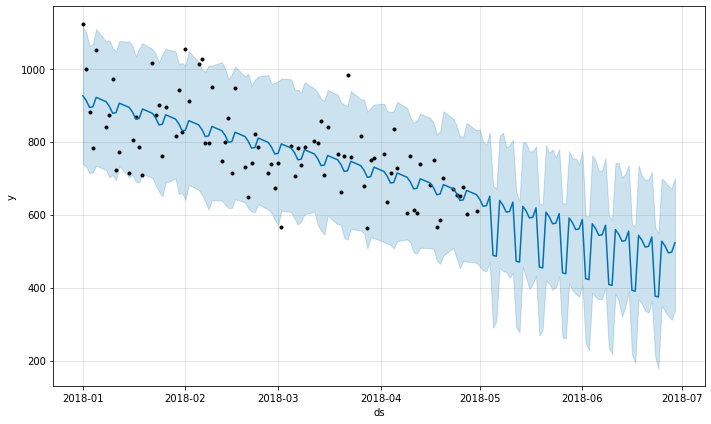

In [ ]:
plot1 = m.plot(forecast)

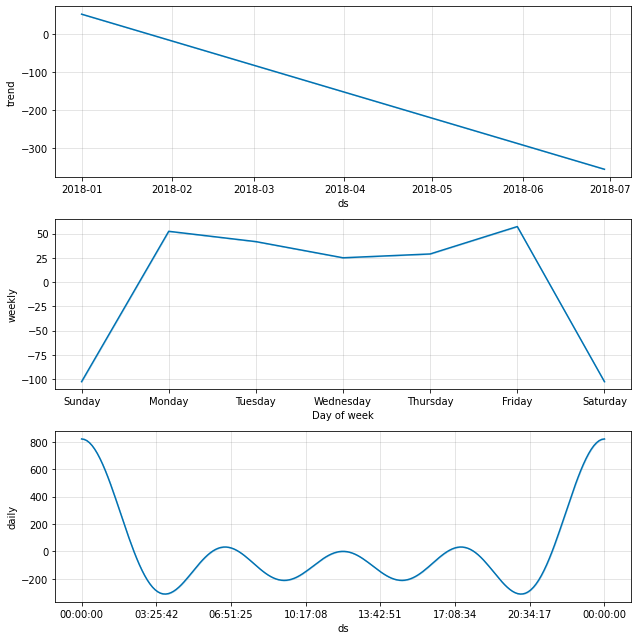

In [ ]:
plot2 = m.plot_components(forecast)